In [1]:
import tensorflow as tf
import pandas as pd
import os
import glob as gb
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Assign path for dataset

In [2]:
TRAIN_DIR = "/kaggle/input/einterface-image-dataset/eINTERFACE_2021_Image/train/"
TEST_DIR = "/kaggle/input/einterface-image-dataset/eINTERFACE_2021_Image/test/"
BATCH_SIZE=64

# Whats there in the dataset

In [3]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 1922 in folder Surprise
For training data, found 1922 in folder Fear
For training data, found 1922 in folder Sadness
For training data, found 1891 in folder Disgust
For training data, found 1922 in folder Happiness
For training data, found 1896 in folder Anger


In [4]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 241 in folder Surprise
For testing data, found 241 in folder Fear
For testing data, found 241 in folder Sadness
For testing data, found 237 in folder Disgust
For testing data, found 241 in folder Happiness
For testing data, found 237 in folder Anger


# See some random images with labels

In [5]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    # We will view images from here
    target_folder = target_dir + target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # read in the image and plot it using matplolib
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    
    return img

In [6]:
class_names = ['Anger','Disgust','Fear','Happiness','Sadness','Surprise']

Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)


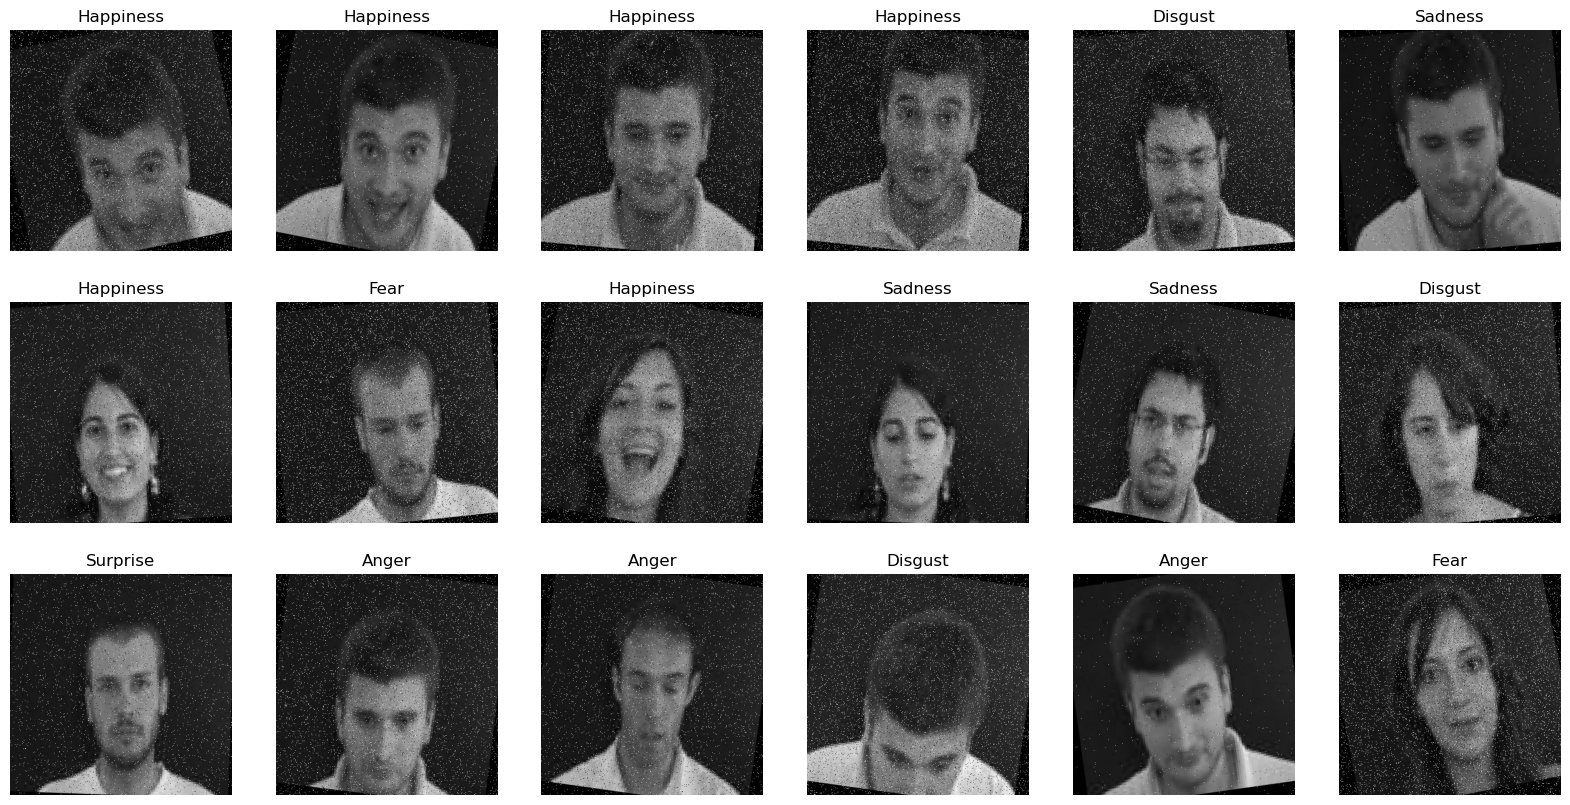

In [7]:
plt.figure(figsize=(20,10))
for i in range(18):
    plt.subplot(3, 6, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir="/kaggle/input/einterface-image-dataset/eINTERFACE_2021_Image/train/", target_class=class_name)

# Preparing data for training

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (128, 128),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (128, 128),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 11475 images belonging to 6 classes.
Found 1438 images belonging to 6 classes.


# The CNN classifier model building

In [9]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(16, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))



# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 6, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [10]:
## model summary
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [11]:
device_name = tf.test.gpu_device_name()
if "GPU" not in device_name:
    print("GPU device not found")
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [12]:
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss", # monitor validation loss (that is, the loss computed for the validation holdout)
        min_delta=1e-2, # "no longer improving" being defined as "an improvement lower than 1e-2"
        patience=10, # "no longer improving" being further defined as "for at least 10 consecutive epochs"
        verbose=1
    )
]

In [13]:
with tf.device('/gpu:0'):
    history = classifier.fit(
        training_set, 
        validation_data=test_set,
        epochs=40,
        callbacks=callbacks,
    )

Epoch 1/40
180/180 [==============================] - 184s 977ms/step - loss: 1.7808 - accuracy: 0.2272 - val_loss: 1.7197 - val_accuracy: 0.2865
Epoch 2/40
180/180 [==============================] - 101s 563ms/step - loss: 1.6134 - accuracy: 0.3447 - val_loss: 1.4895 - val_accuracy: 0.4006
Epoch 3/40
180/180 [==============================] - 99s 552ms/step - loss: 1.4281 - accuracy: 0.4189 - val_loss: 1.2898 - val_accuracy: 0.4548
Epoch 4/40
180/180 [==============================] - 99s 552ms/step - loss: 1.2663 - accuracy: 0.4843 - val_loss: 1.2319 - val_accuracy: 0.5083
Epoch 5/40
180/180 [==============================] - 99s 551ms/step - loss: 1.1459 - accuracy: 0.5414 - val_loss: 1.1297 - val_accuracy: 0.5459
Epoch 6/40
180/180 [==============================] - 99s 552ms/step - loss: 1.0447 - accuracy: 0.5868 - val_loss: 1.0391 - val_accuracy: 0.6001
Epoch 7/40
180/180 [==============================] - 101s 560ms/step - loss: 0.9511 - accuracy: 0.6308 - val_loss: 0.8869 - val

In [14]:
history = classifier.fit(training_set,
                         epochs = 10,
                         validation_data = test_set)


classifier.save('model1.h5')  # creates a HDF5 file 'my_model.h5'

Epoch 1/10
180/180 [==============================] - 98s 546ms/step - loss: 0.3010 - accuracy: 0.8892 - val_loss: 0.4850 - val_accuracy: 0.8324
Epoch 2/10
180/180 [==============================] - 98s 543ms/step - loss: 0.2883 - accuracy: 0.8966 - val_loss: 0.4271 - val_accuracy: 0.8491
Epoch 3/10
180/180 [==============================] - 98s 544ms/step - loss: 0.2775 - accuracy: 0.9010 - val_loss: 0.4511 - val_accuracy: 0.8421
Epoch 4/10
180/180 [==============================] - 97s 537ms/step - loss: 0.2761 - accuracy: 0.8993 - val_loss: 0.3781 - val_accuracy: 0.8602
Epoch 5/10
180/180 [==============================] - 97s 536ms/step - loss: 0.2704 - accuracy: 0.9014 - val_loss: 0.3095 - val_accuracy: 0.8971
Epoch 6/10
180/180 [==============================] - 98s 541ms/step - loss: 0.2822 - accuracy: 0.9016 - val_loss: 0.6163 - val_accuracy: 0.8039
Epoch 7/10
180/180 [==============================] - 98s 542ms/step - loss: 0.2711 - accuracy: 0.9022 - val_loss: 0.3715 - val_ac

# Evaluation


In [15]:
classifier.evaluate(test_set)

23/23 [==============================] - 7s 287ms/step - loss: 0.3473 - accuracy: 0.8748


[0.34731030464172363, 0.8748261332511902]

Text(0, 0.5, 'Loss')

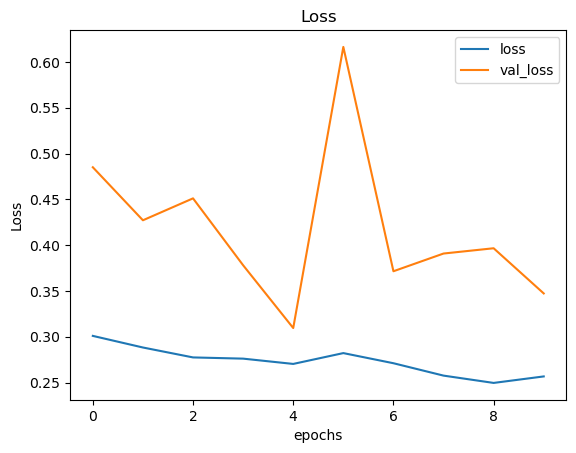

In [16]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

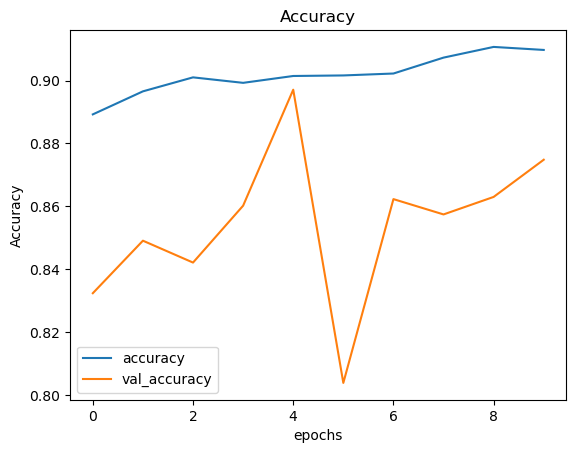

In [17]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

In [18]:
model_path = "model1.h5"
loaded_model = keras.models.load_model(model_path)

import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

image = cv2.imread("/kaggle/input/einterface-image-dataset/eINTERFACE_2021_Image/test/Fear/myvideo_frames0_jpg.rf.9bba0bbf9aeb4bf47c4f8e2269cb3c85.jpg")
image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((128, 128))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()
result

1/1 [==============================] - 0s 128ms/step


2

In [19]:
training_set.class_indices

{'Anger': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happiness': 3,
 'Sadness': 4,
 'Surprise': 5}